# Visulaizing
After the splot of 

https://github.com/JHC90/HandsOnMachineLearningSciKitTensorFlow/blob/master/Own-Examples/1_DataExploring.ipynb


we split the data into train test and 


In [22]:
import DownloadAndExtractAndLoadDatasets as DEL # my own Module
from platform import python_version
import pandas as pd
import numpy as np
import hashlib
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




print(python_version())

import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__,
list(imports())

%matplotlib inline # only in a Jupyter notebook

3.7.4


UsageError: unrecognized arguments: # only in a Jupyter notebook


In [23]:

DEL.fetch_housing_data()

In [24]:
WorkingData = DEL.load_housing_data()

In [25]:
WorkingData["income_cat"] = np.ceil(WorkingData["median_income"] / 1.5)
WorkingData["income_cat"].where(WorkingData["income_cat"] < 5, 5.0, inplace=True)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(WorkingData, WorkingData["income_cat"]):
    strat_train_set = WorkingData.loc[train_index]
    strat_test_set = WorkingData.loc[test_index]

In [27]:
# from sklearn.model_selection import StratifiedShuffleSplit
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [28]:
# for the visualization we make a copy
housing = strat_train_set.copy()

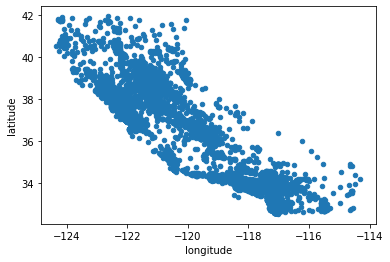

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")

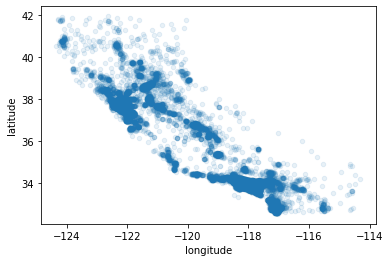

In [30]:
# now we check the density of the data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

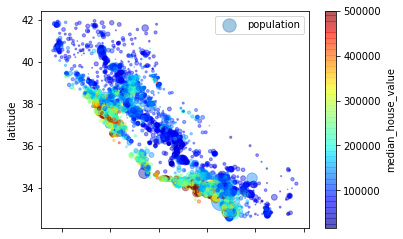

In [31]:
# including the housing Prices in the datapoints using clolours
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

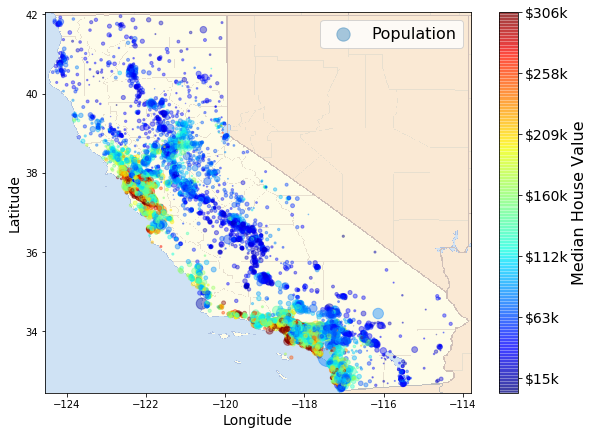

In [34]:
# now we add in the Background the Picture of California
import matplotlib.image as mpimg
california_img=mpimg.imread('../images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()